# <u>Visualización con Seaborn</u>

Seaborn es más que una mera librería de visualización, es una librería para representación estadística, ya que muestra fácilmente la relación que guardan los datos para detectar tendencias y patrones.

Seaborn es una librería para pintar gráficas construidas a partir de matplotlib.

In [ ]:
# actualizamos seaborn a la versión más actualizada

# !pip install seaborn --upgrade

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from pydataset import data   #contiene datasets incluidos para pruebas
iris = data('iris')

In [ ]:
# si quieren instalar pydataset
# !pip install pydataset

In [ ]:
# iris = pd.read_csv('data/iris.csv')

In [3]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


* **Barplot.** Muy recomendable para la visuación de datos agregados, como la media.

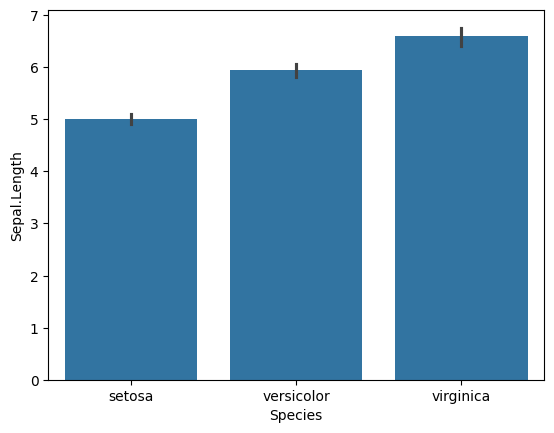

In [4]:
sns.barplot(x='Species', y='Sepal.Length', data=iris, estimator=np.mean) #estimador media
plt.show()

In [8]:
df=iris
df.head() 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [16]:
groupedvalues = df.groupby('Species').mean()  #agrupar por especies, ahora el indice se vuelve las especies y sacar la media
groupedvalues

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [18]:
groupedvalues=df.groupby('Species').mean().reset_index() #agregar indice numerico
groupedvalues 

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


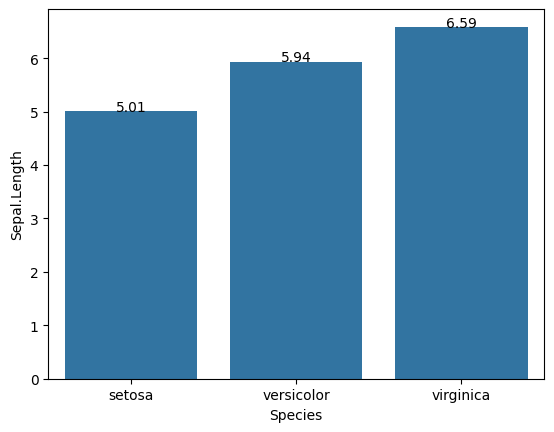

In [19]:
g=sns.barplot(x='Species',y='Sepal.Length',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    g.text(row.name,row['Sepal.Length'], round(row['Sepal.Length'],2), color='black', ha="center") #agregar los valores

* **Histograma.** Para conocer la distribución de los datos, el histograma es una herramienta básica, sin embargo, esta representación está muy influenciada por el número de bins que se seleccionen y el ancho de cada uno.

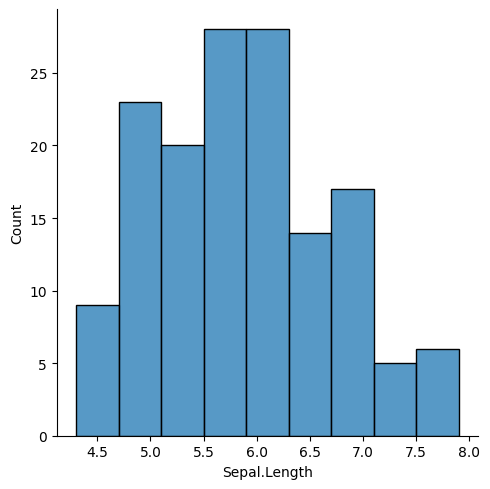

In [20]:
sns.displot(iris['Sepal.Length'])
plt.show()

* **KDE plots (Kernel Density Estimation plots).** Genera mejores representaciones de distribuciones de datos que un histograma al suavizar la forma de los datos, pero no aporta información estadística.

C:\Users\dg_su\AppData\Local\Temp\ipykernel_27388\2367861836.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=iris['Sepal.Length'], shade=True)


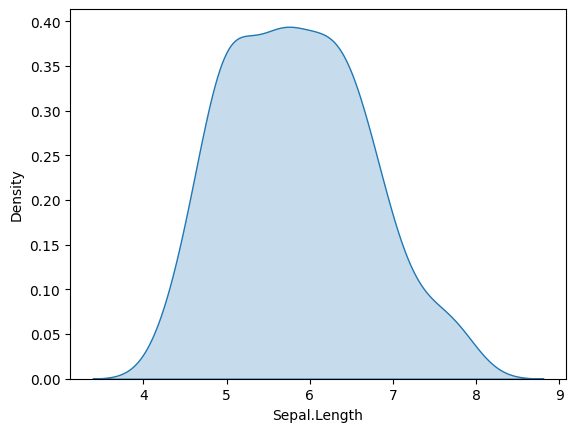

In [21]:
sns.kdeplot(data=iris['Sepal.Length'], shade=True)
plt.show()

* **Box plots.** Útiles para conocer los rangos de datos, si existen outliers, la media y el rango intercuartil en el que se distribuyen los datos.

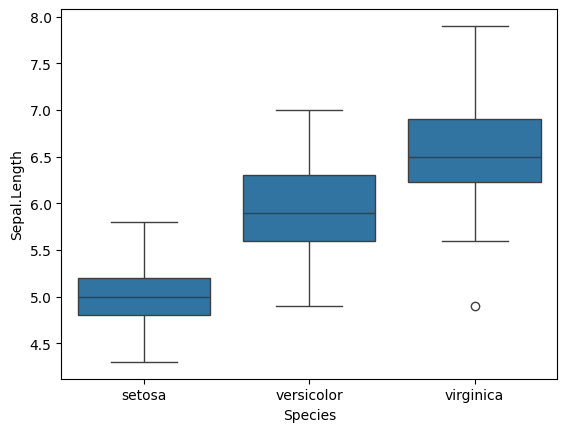

In [22]:
sns.boxplot(data=iris, x='Species', y='Sepal.Length')
plt.show()

* **Violin plots.** La conjunción de KDE + box plots, clave para comparar distribuciones. Un violin representa la distribución, su media, el rango intercuartil y el intervalo de confianza de 95% en el que se distruyen los mapas.

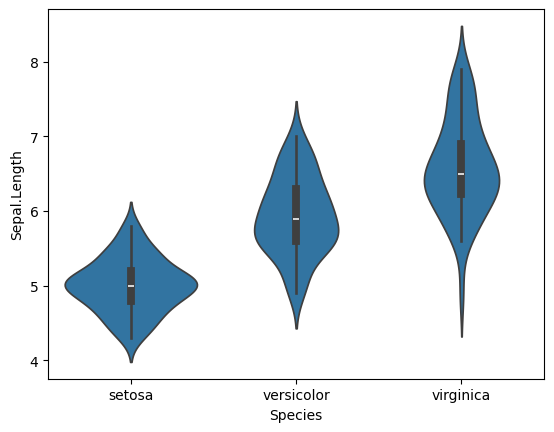

In [23]:
sns.violinplot(data=iris, x='Species', y='Sepal.Length')
plt.show()

* **Catplot().** Este método es muy útil cuando en el análisis se representan variables categóricas. Otra alternativa al diagrama de barras.

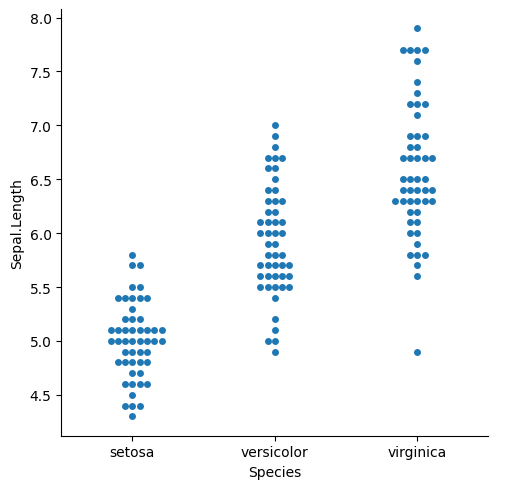

In [24]:
sns.catplot(x='Species', y='Sepal.Length', kind="swarm", data=iris)
plt.show()

* **Scatter plots.** Ideal para la representación de correlaciones y cómo una variable afecta a la otra

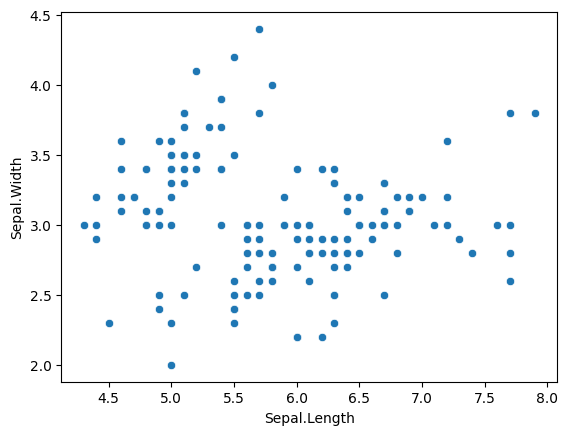

In [25]:
sns.scatterplot(x="Sepal.Length", y="Sepal.Width", data=iris)
plt.show()

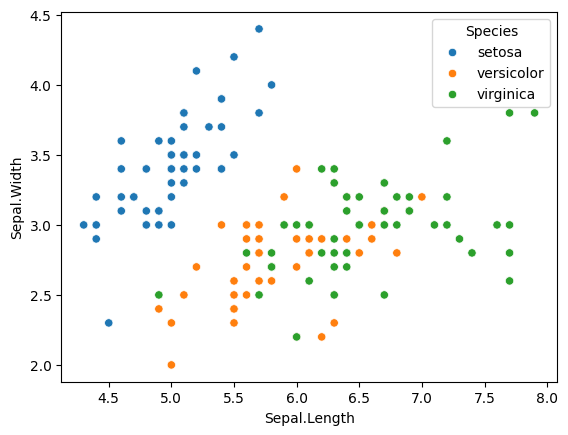

In [26]:
sns.scatterplot(x="Sepal.Length", y="Sepal.Width", hue='Species', data=iris) #hue = agrupar por "species"
plt.show()

Para más ejemplos: https://seaborn.pydata.org/

Cómo desarrollar cada gráfico de forma correcta: https://www.python-graph-gallery.com/

### Veamos otros ejemplos gráficos

In [27]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


**Histogramas y funciones de densidad**

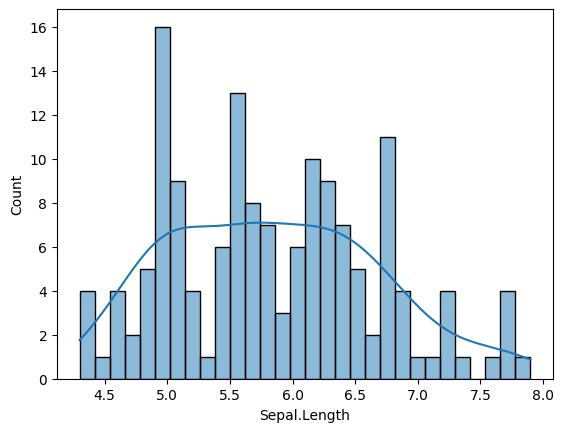

In [28]:
sns.histplot(iris['Sepal.Length'],bins=30,kde=True)
plt.show()
# kde = True por default, te presenta la curva de densidad.
# hist : True/False, te presenta el histograma.

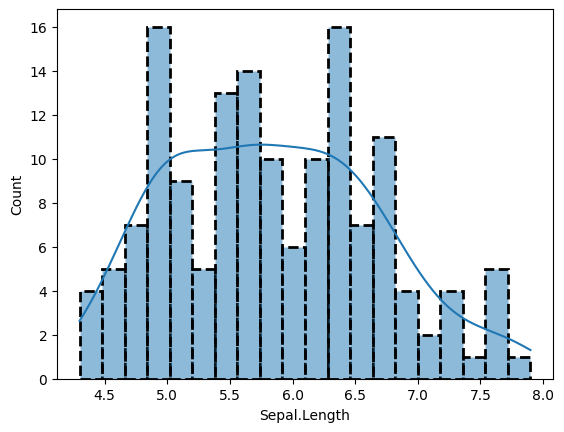

In [29]:
sns.histplot(iris['Sepal.Length'],bins=20,kde=True,edgecolor="black",linewidth=2,linestyle='--')
plt.show()

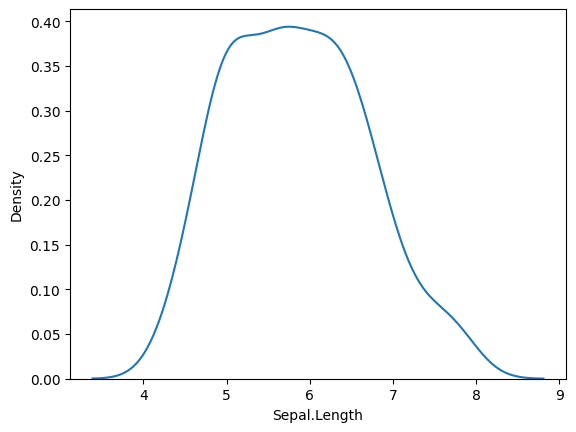

In [30]:
sns.kdeplot(iris['Sepal.Length']) #kdeplot -> grafico de densidad
plt.show()

C:\Users\dg_su\AppData\Local\Temp\ipykernel_27388\1844544291.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(iris['Sepal.Length'],shade=True, color='green')


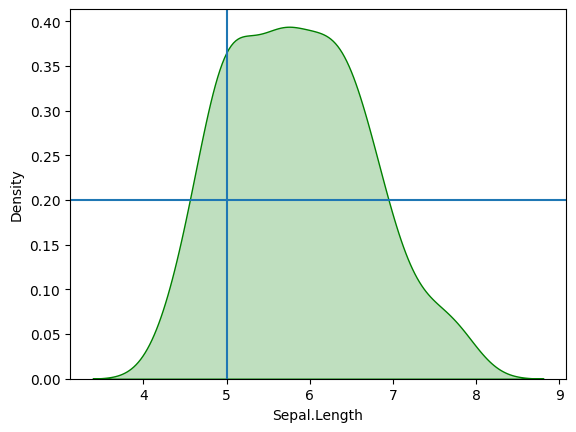

In [32]:
sns.kdeplot(iris['Sepal.Length'],shade=True, color='green')
plt.axhline(y=0.2)
plt.axvline(x=5)
plt.show()

**ScatterPlot**

In [33]:
sns.scatterplot?

Signature:
sns.scatterplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
`hue` and `style` for the same variable) can be helpful for making
graphics more accessible.

See the :ref:`tutorial <relational_tutorial>` for more information.

The de

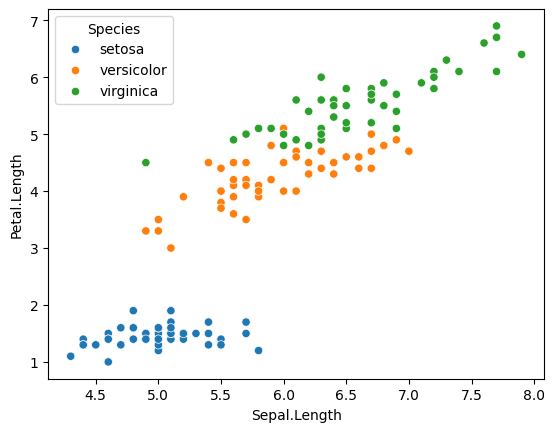

In [34]:
sns.scatterplot(data=iris,x='Sepal.Length',y='Petal.Length',hue='Species')
plt.show()

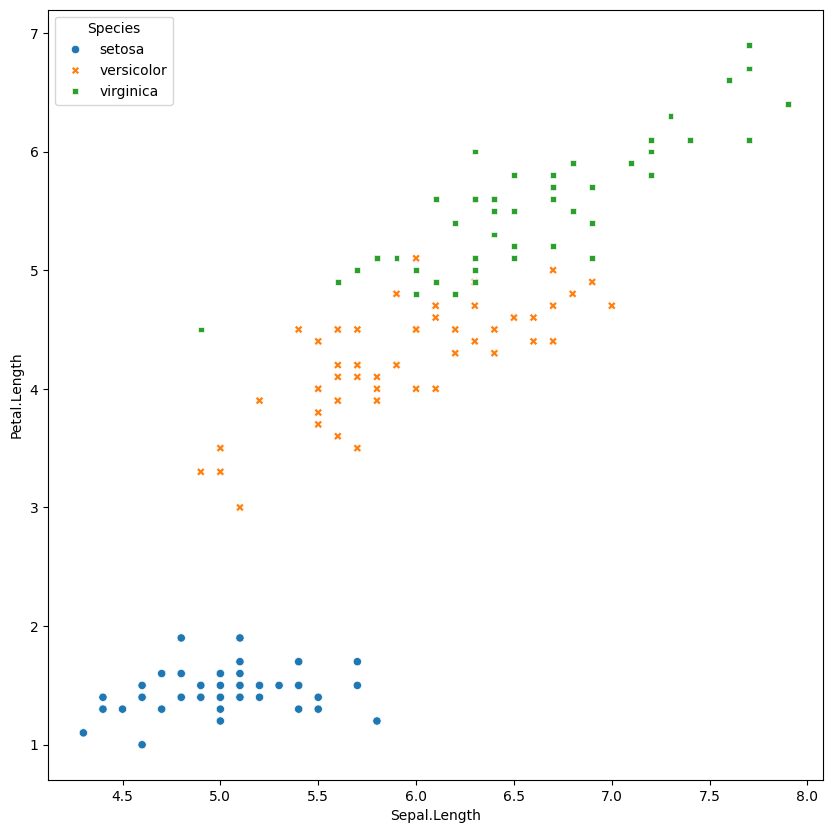

In [36]:
# adicionamos estilo de marcadores
plt.figure(figsize=(10,10))
sns.scatterplot(data=iris,x='Sepal.Length',y='Petal.Length',hue='Species',style='Species') #hue color diferente para cada especie, style, estilo diferentre para cada especie
plt.show()

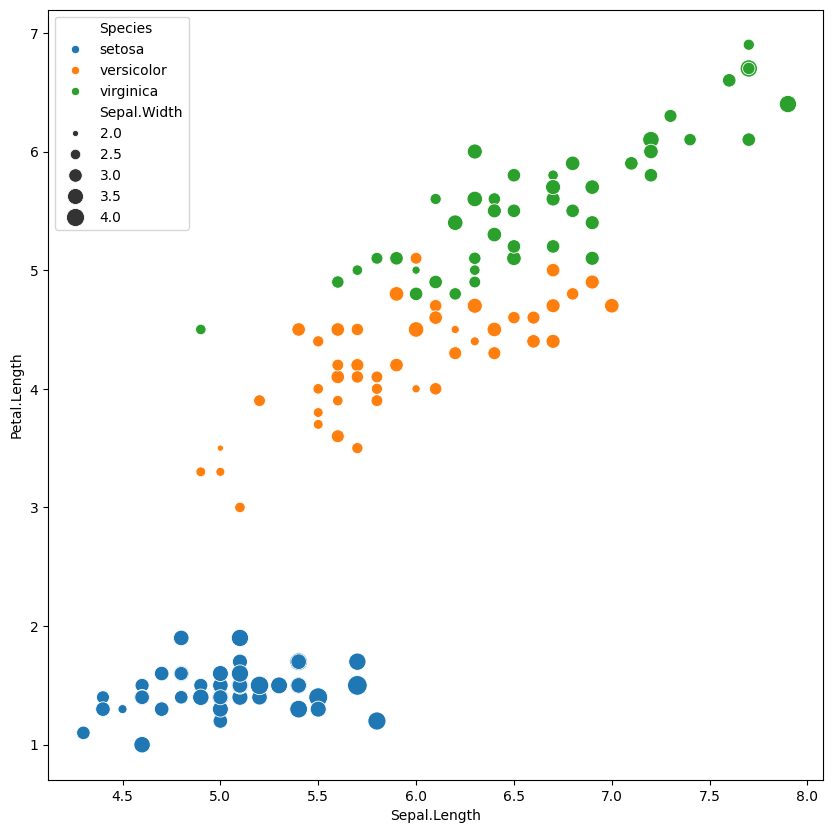

In [37]:
#incluimos el tamaño
plt.figure(figsize=(10,10))
sns.scatterplot(data=iris,x='Sepal.Length',y='Petal.Length',hue='Species',size='Sepal.Width',sizes=(20, 200))
plt.show()

Más sobre scatterplots: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

#### Distribuciones Bivariantes

* El equivalente a plt.scatter de matplotlib en seaborn es sns.jointplot().
* No solo pinta el scatter sino que de manera automática muestra los histogramas de las variables involucradas

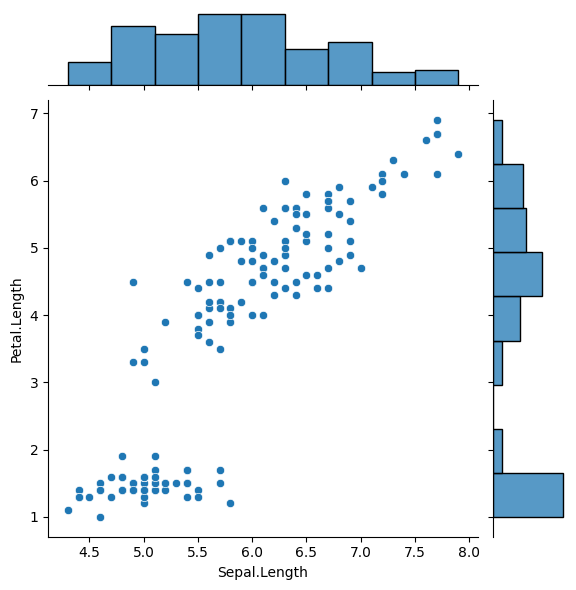

In [38]:
sns.jointplot(x=iris['Sepal.Length'],y=iris['Petal.Length'])
plt.show()

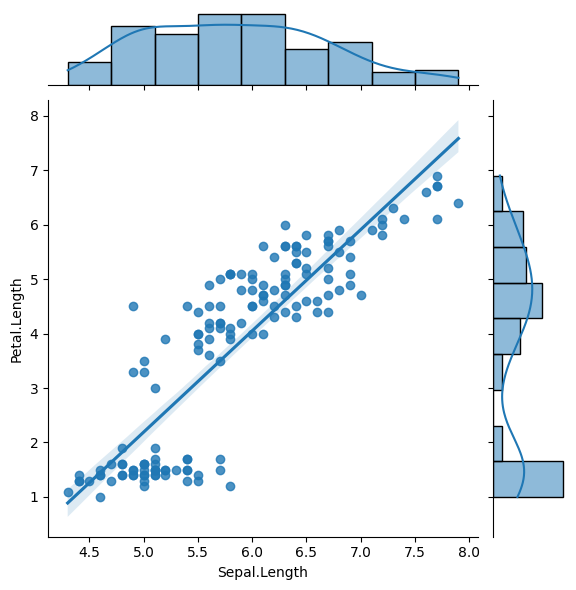

In [39]:
sns.jointplot(x=iris['Sepal.Length'],y=iris['Petal.Length'],kind='reg')
plt.show()

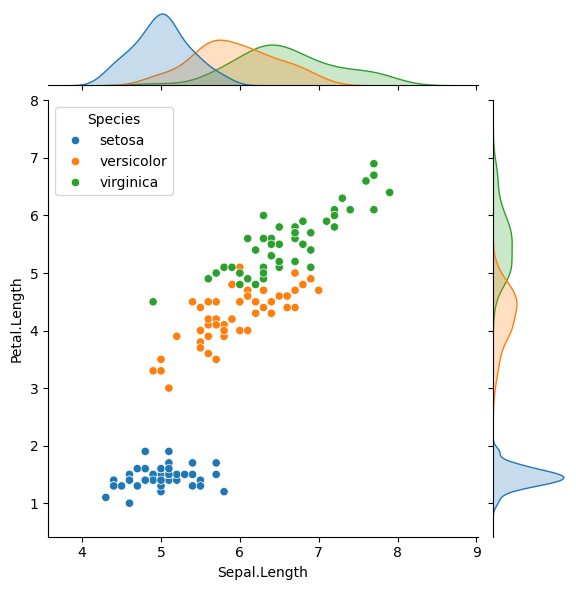

In [40]:
sns.jointplot(x=iris['Sepal.Length'],y=iris['Petal.Length'],hue=iris['Species'])
plt.show()

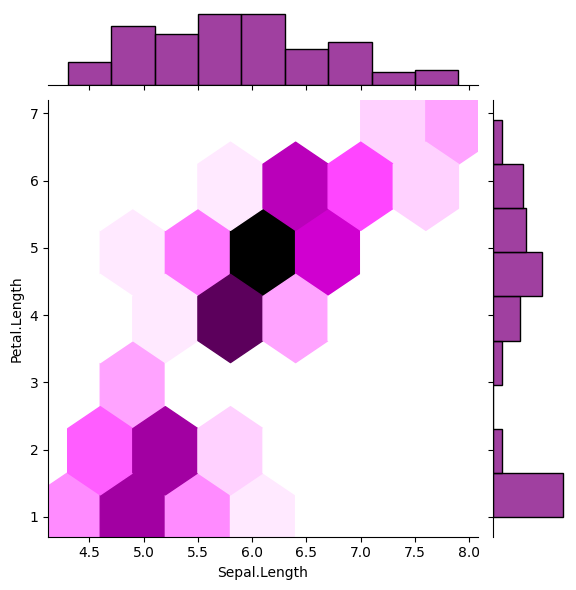

In [41]:
sns.jointplot(x=iris['Sepal.Length'],y=iris['Petal.Length'],kind='hex',color ='purple')
plt.show()

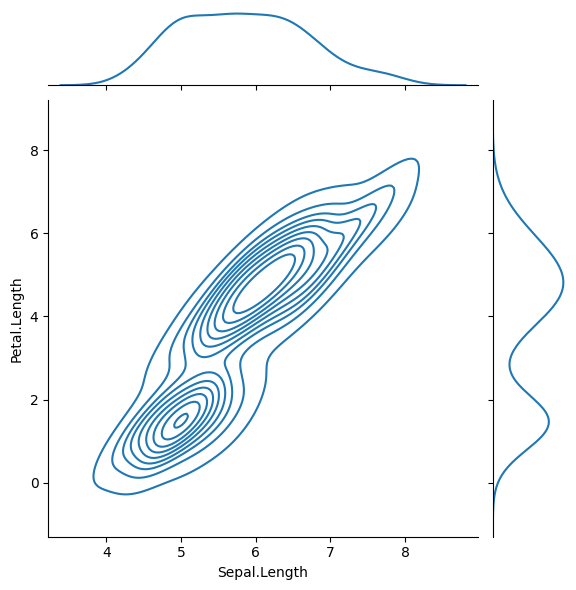

In [42]:
sns.jointplot(x=iris['Sepal.Length'],y=iris['Petal.Length'],kind='kde')
plt.show()

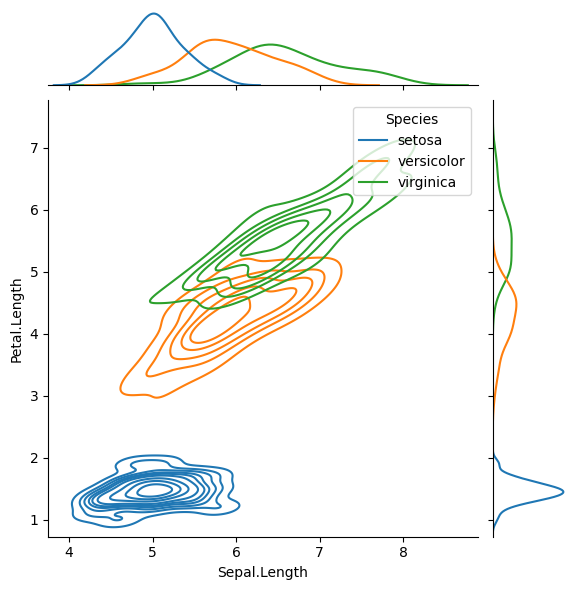

In [43]:
snsObject=sns.jointplot(x=iris['Sepal.Length'],y=iris['Petal.Length'],hue=iris['Species'],kind='kde')
plt.show()

Probemos con otra data:

In [45]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


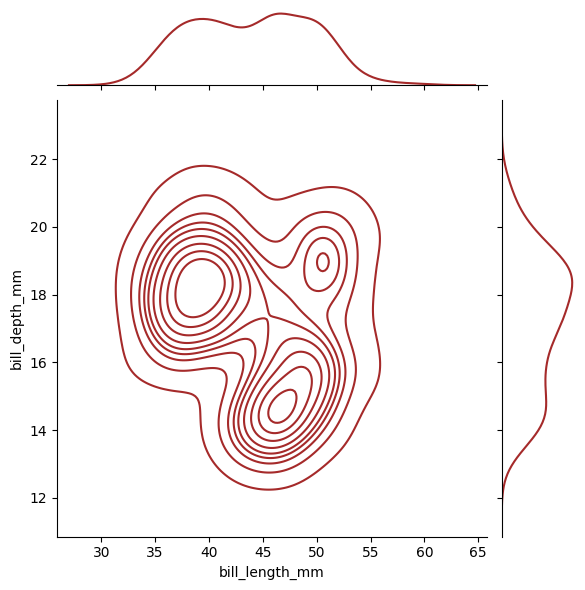

In [44]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm",kind='kde', color = 'brown')
plt.show()

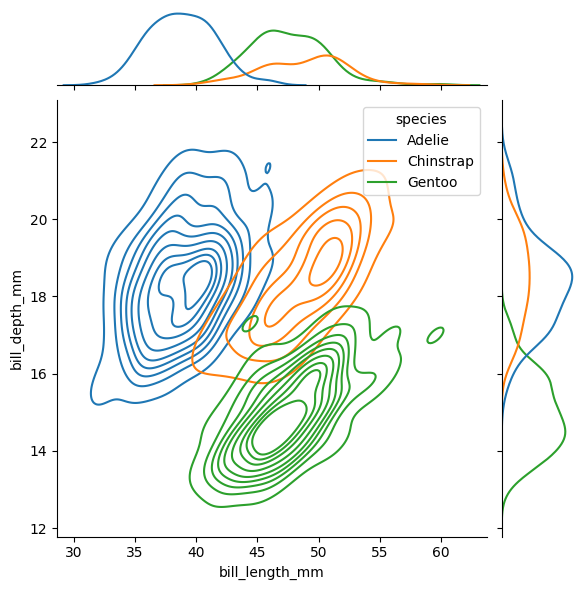

In [46]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm",kind='kde', color = 'brown',hue="species")
plt.show() 

**Relaciones entre todas las variables**

    * pairplot()


Es muy útil poder ver las relaciones entre todas las variables existentes.
Para esto existen las funciones pairplot(), PairGrid().

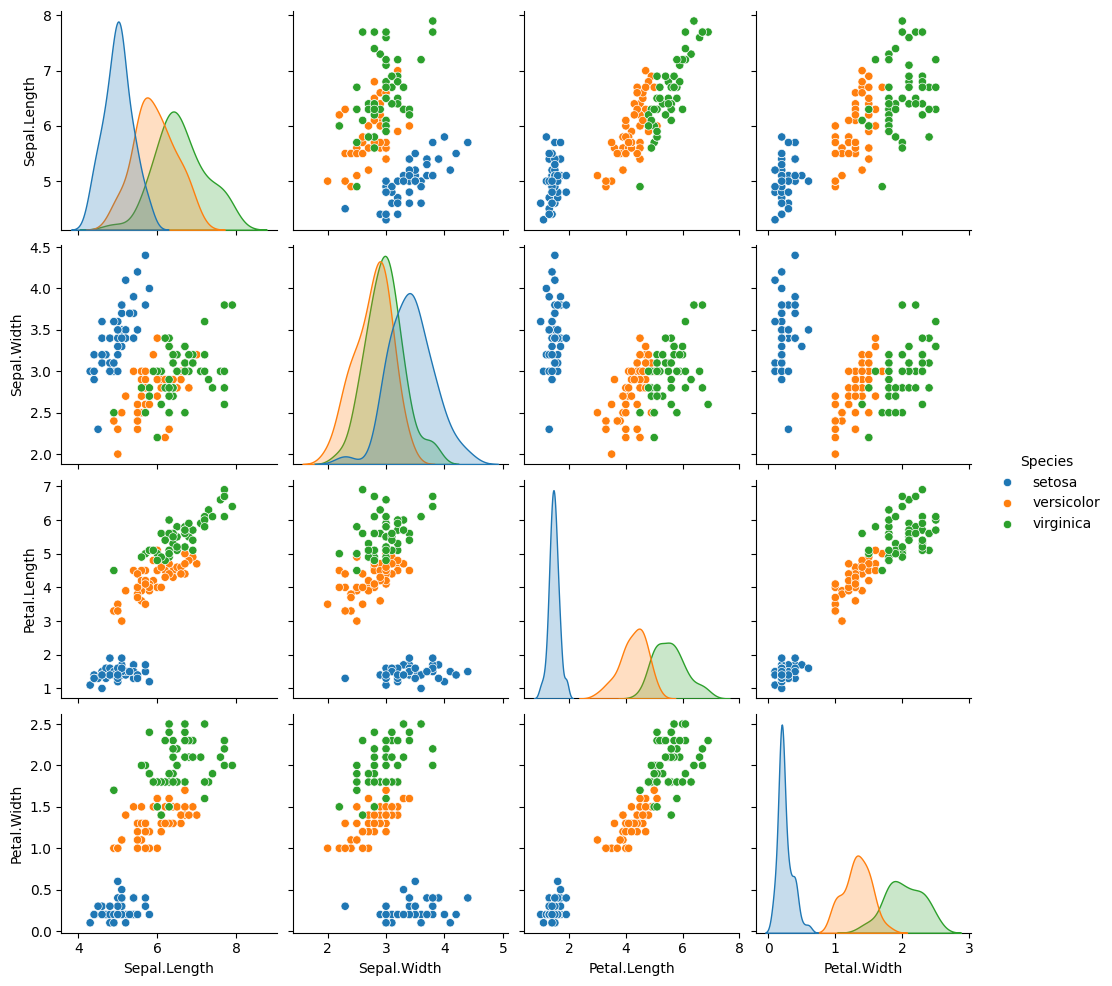

In [47]:
sns.pairplot(iris,hue='Species')
plt.show()

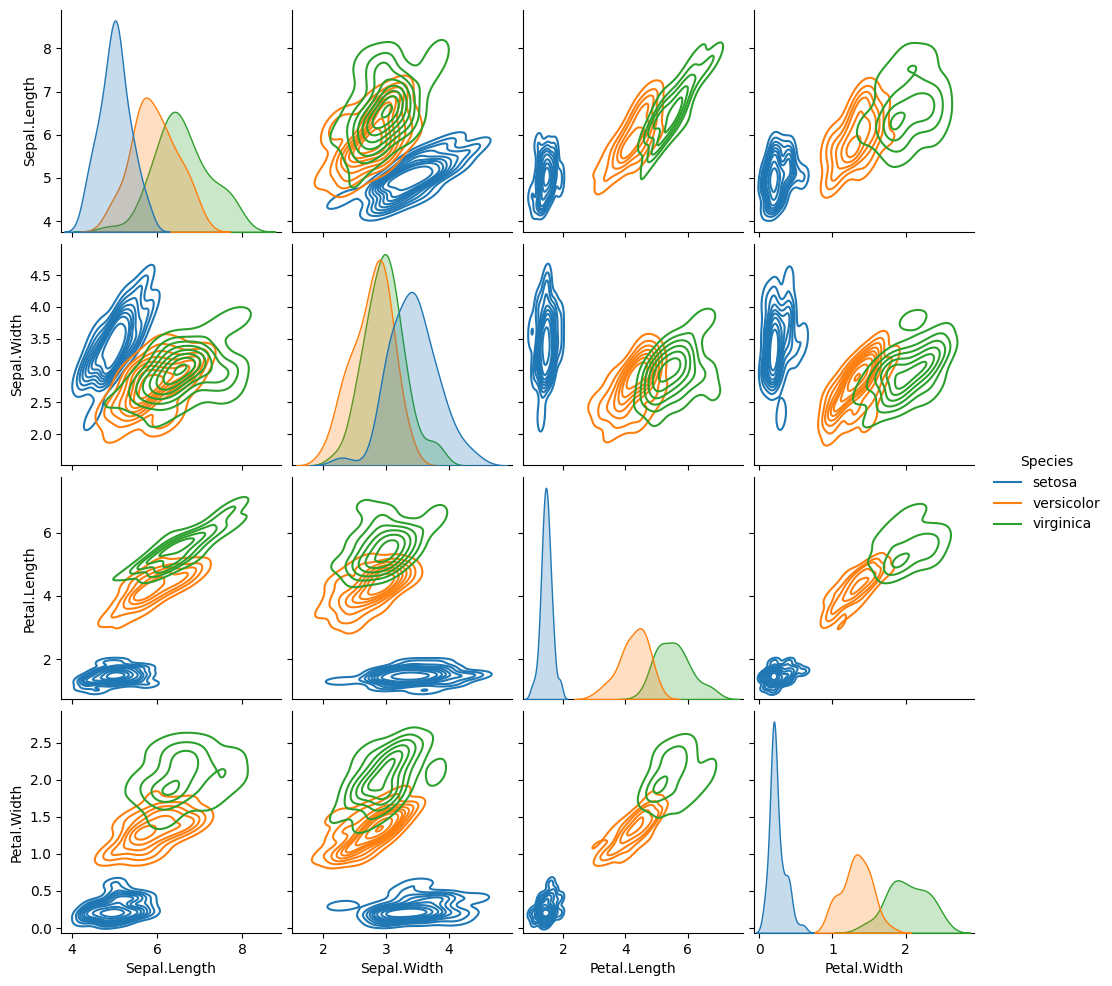

In [48]:
sns.pairplot(iris,hue='Species',kind='kde')
plt.show()

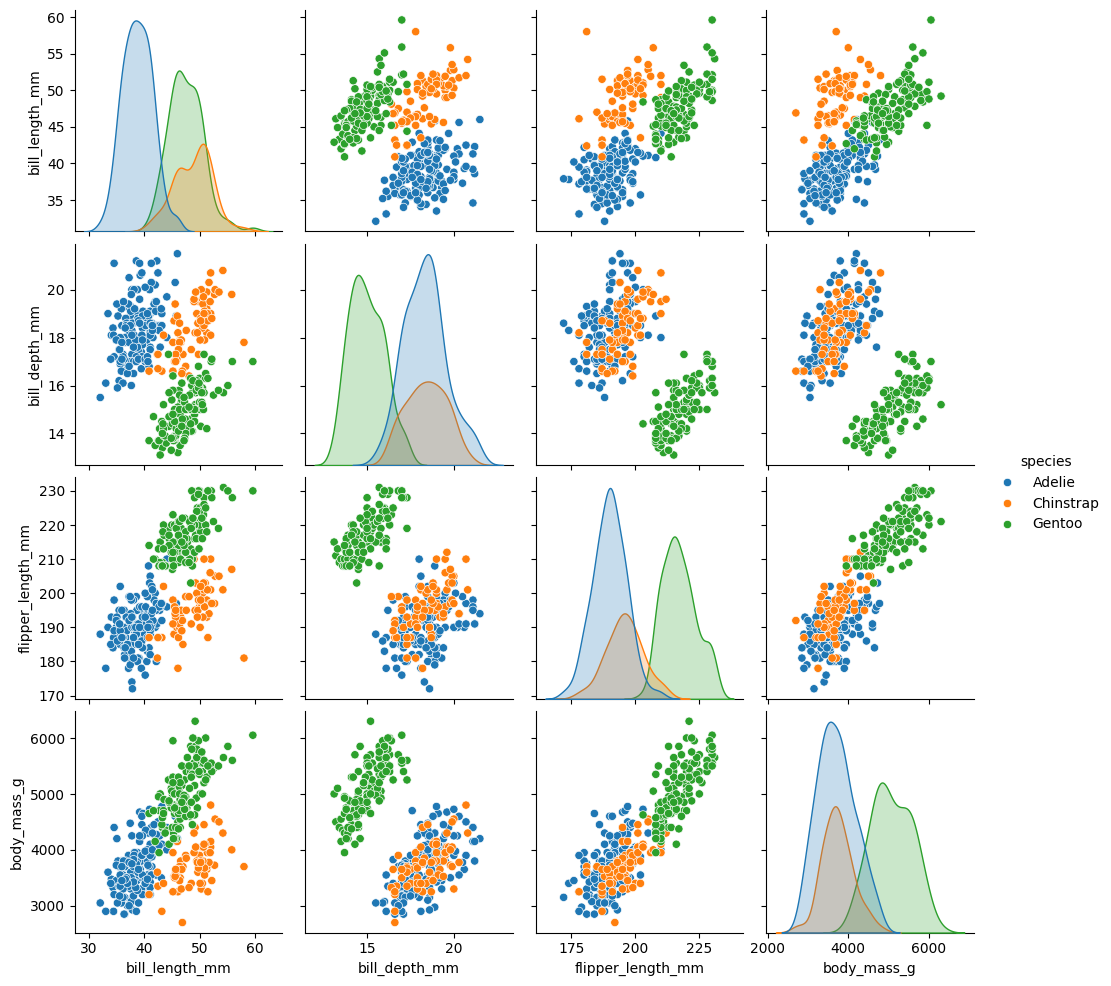

In [49]:
sns.pairplot(penguins,hue='species')
plt.show()

Para guardar el último gráfico ejecutado en un archivo, podemos utilizar la función **savefig** de matplotlib.pyplot:

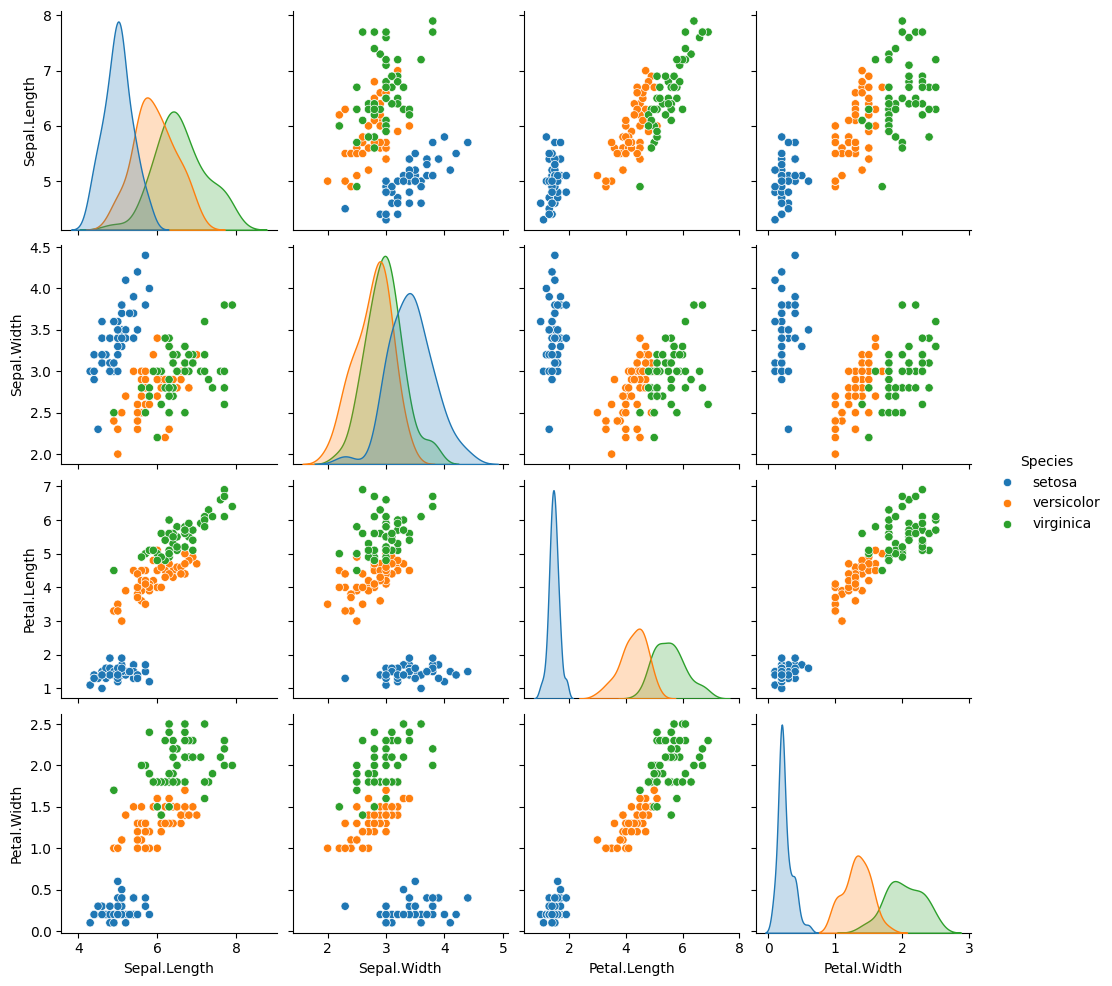

In [50]:
# permite guardar el último gráfico ejecutado
sns.pairplot(iris, hue = "Species")
plt.savefig("Correlaciones.jpg")

### Extra:
En la librería ***seaborn*** tenemos un listado de conjuntos de datos de prueba que podemos utilizar: 

In [51]:
#import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [52]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [53]:
titanic = sns.load_dataset('titanic')
titanic.shape

(891, 15)

In [54]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [55]:
accidentes = sns.load_dataset('car_crashes')
accidentes.shape

(51, 8)

In [56]:
accidentes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [57]:
help(sns.load_dataset)

Help on function load_dataset in module seaborn.utils:

load_dataset(name, cache=True, data_home=None, **kws)
    Load an example dataset from the online repository (requires internet).

    This function provides quick access to a small number of example datasets
    that are useful for documenting seaborn or generating reproducible examples
    for bug reports. It is not necessary for normal usage.

    Note that some of the datasets have a small amount of preprocessing applied
    to define a proper ordering for categorical variables.

    Use :func:`get_dataset_names` to see a list of available datasets.

    Parameters
    ----------
    name : str
        Name of the dataset (``{name}.csv`` on
        https://github.com/mwaskom/seaborn-data).
    cache : boolean, optional
        If True, try to load from the local cache first, and save to the cache
        if a download is required.
    data_home : string, optional
        The directory in which to cache data; see :func:`get_dat

In [58]:
#listado de datasets
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

Más información de estos conjuntos de datos en: https://github.com/mwaskom/seaborn-data